<div class="alert alert-block alert-info">
<h1>Statistical tests : <code>2-statistical_tests.ipynb</code></h1>
</div>

---

## The aim of this notebook is to apply statistical tests to our peak table to see which features are significantly differentially distributed between the two sample classes (Disease vs. Healthy)

---
# Table of contents
- [0 - Import modules](#0---Import-modules)
- [0 - Import useful functions](#0---Import-useful-functions)
- [0 - Import peak table (with strongly correlated features removed in the previous notebook)](#0---Import-peak-table-(with-strongly-correlated-features-removed-in-the-previous-notebook))
- [1 - Test of normality with two statistical tests](#1---Test-of-normality-with-two-statistical-tests)
- [2 - Test of difference between two target classes](#2---Test-of-difference-between-two-target-classes)
  - [a - Boxplots and histograms for a few significant features (first 6 here)](#a---Boxplots-and-histograms-for-a-few-significant-features-(first-6-here))
  - [b - Histogram of pvalues](#b---Histogram-of-pvalues)
- [3 - Multiple testing correction](#3---Multiple-testing-correction)
  - [a - Bonferroni correction](#a---Bonferroni-correction)
  - [b - Holm-Bonferroni correction](#b---Holm-Bonferroni-correction)
  - [c - Benjamini-Hochberg correction](#c---Benjamini-Hochberg-correction)
  - [d - FDR correction](#d---FDR-correction)
- [4 - Relative log abundance](#4---Relative-log-abundance)
---

# 0 - Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setting working directory
import re
pwd = ! pwd
pwd = re.sub('notebooks/', '', pwd[0])
pwd = '/'.join(pwd.split('/')[:-1]) + '/'
print(f'Working directory : {pwd}')

# Print Python version
python_version = ! python --version
print(f'Python version : {python_version[0]}')

Working directory : /home/jovyan/work/
Python version : Python 3.10.4


In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"figure.figsize": (15,8), "axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 15, 8

sns.set_theme(style="darkgrid")

# 0 - Import useful functions

In [4]:
# In the bin folder, python scripts containing useful functions can be found.
# Functions for data exploration are located in file explore_data_functions.py

import sys
sys.path.append(pwd + 'bin/')

from explore_data_functions import *
from statistical_test import *

# 0 - Import peak table (with strongly correlated features removed in the previous notebook)

In [5]:
# We store the imported peak table and set a copy in an other dataframe
# We can have access to the initial peak table any time
# Hint : It is always better to manipulate a copy than the original dataframe

peakTable_imported = pd.read_csv(pwd + 'data/synthetic_dataset/synthetic_dataset_remove_corr.csv')
peakTable = peakTable_imported.copy()
peakTable

,SampleID,Disease,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,CRR_001,CRR,227.826520,117.012086,750.015310,106.848690,941.250268,28.308256,46.263365,1744.688754,...,23332.588540,345.695685,0.000000,0.000000,0.000000,5.194313,166.610410,77.783406,8.630945,62.252431
1,CRR_002,CRR,587.927618,129.710850,594.600666,145.488720,896.401881,27.842101,73.665886,1551.050083,...,19571.422043,242.840315,1.981778,0.000000,4.669376,112.927400,180.437923,53.271213,118.352041,73.772876
2,CRR_003,CRR,300.819627,208.803545,649.198550,99.151068,634.809418,7.656808,211.861276,1555.589994,...,3825.640322,1136.728114,301.778637,250.099082,190.029159,350.832313,293.545028,263.923145,356.792481,53.630690
3,CRR_004,CRR,574.124723,225.087555,586.409285,115.209639,628.911754,15.336427,94.711215,1643.625627,...,3900.435683,777.466659,312.186350,299.824366,266.307245,101.532018,338.136807,203.295067,188.081878,71.392762
4,CRR_005,CRR,235.369264,123.061042,638.782555,46.975815,724.054416,13.855861,85.444824,2163.577857,...,402.489171,1393.864687,202.706069,176.957407,158.474161,200.285709,769.535852,289.908010,515.551782,46.859103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,HCC_296,HCC,1307.377728,187.166724,330.124145,1100.770379,610.444945,731.605822,783.995362,804.098475,...,473.805391,354.091994,246.883160,176.488767,175.813061,331.700933,787.599359,19.945047,456.842307,55.751046
596,HCC_297,HCC,714.674697,88.631286,295.155447,217.305148,369.804011,252.653913,216.791172,462.004967,...,1839.941207,519.450121,114.346408,83.062311,89.827003,309.682566,348.038788,83.925800,365.545100,46.222988
597,HCC_298,HCC,1034.242121,699.345217,380.957087,604.125654,431.331251,309.331561,460.046415,887.358755,...,149.149811,703.127195,371.898553,286.148673,261.366945,351.607766,514.511997,111.443139,1045.644800,97.461422
598,HCC_299,HCC,870.037466,28.948919,177.750685,323.497432,299.576371,459.865707,405.623088,333.229357,...,822.090326,388.178444,44.474945,50.019532,62.189603,467.290703,181.126309,13.391195,410.875464,33.517221


In [6]:
peakTable.shape

(600, 589)

The peak table contains 600 rows (samples), 1588 columns (2 for metadata and 1586 compounds)

### Keep only intensities in the following dataframe

In [7]:
intensities_remove_corr = peakTable.iloc[:, ['variable' in col for col in peakTable.columns]]
intensities_remove_corr.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_1505,variable_1513,variable_1518,variable_1519,variable_1521,variable_1524,variable_1528,variable_1533,variable_1540,variable_1564
0,227.826520,117.012086,750.015310,106.848690,941.250268,28.308256,46.263365,1744.688754,109.607280,1474.590504,...,23332.588540,345.695685,0.000000,0.000000,0.000000,5.194313,166.610410,77.783406,8.630945,62.252431
1,587.927618,129.710850,594.600666,145.488720,896.401881,27.842101,73.665886,1551.050083,92.467096,1443.736018,...,19571.422043,242.840315,1.981778,0.000000,4.669376,112.927400,180.437923,53.271213,118.352041,73.772876
2,300.819627,208.803545,649.198550,99.151068,634.809418,7.656808,211.861276,1555.589994,459.127995,1424.382600,...,3825.640322,1136.728114,301.778637,250.099082,190.029159,350.832313,293.545028,263.923145,356.792481,53.630690
3,574.124723,225.087555,586.409285,115.209639,628.911754,15.336427,94.711215,1643.625627,389.919091,1537.402022,...,3900.435683,777.466659,312.186350,299.824366,266.307245,101.532018,338.136807,203.295067,188.081878,71.392762
4,235.369264,123.061042,638.782555,46.975815,724.054416,13.855861,85.444824,2163.577857,485.004097,452.314008,...,402.489171,1393.864687,202.706069,176.957407,158.474161,200.285709,769.535852,289.908010,515.551782,46.859103


In [8]:
intensities_remove_corr.shape

(600, 587)

### Keep only metadata in the following dataframe

In [9]:
metadata = peakTable.drop(intensities_remove_corr.columns, axis=1)
metadata

,SampleID,Disease
0,CRR_001,CRR
1,CRR_002,CRR
2,CRR_003,CRR
3,CRR_004,CRR
4,CRR_005,CRR
...,...,...
595,HCC_296,HCC
596,HCC_297,HCC
597,HCC_298,HCC
598,HCC_299,HCC


In [10]:
metadata.shape

(600, 2)

### Our target here is <code>Disease</code> column in metadata, let's create a variable <code>target</code>

In [11]:
target = metadata['Disease']
target

0      CRR
1      CRR
2      CRR
3      CRR
4      CRR
      ... 
595    HCC
596    HCC
597    HCC
598    HCC
599    HCC
Name: Disease, Length: 600, dtype: object

# 1 - Test of normality with two statistical tests

- #### Shapiro-Wilk test : *scipy.stats.shapiro*
- #### D'Agostino's K-squared test : *scipy.stats.normaltest*

For each variable in the peak table, we want to know if it is normally distributed, to apply either parametric ou non-parametric tests in the follow-up.

Below, we separate the intensities dataframe between the two classes.

Then, we test each feature to see if both classes are normally distributed.

In [12]:
### Get different values of target
uniques_target = np.unique(target)

### Subset intensities dataframe with rows of first class
index_1 = target[target == uniques_target[0]].index
X_1 = intensities_remove_corr.iloc[index_1, :]

### Subset intensities dataframe with rows of second class
index_2 = target[target == uniques_target[1]].index
X_2 = intensities_remove_corr.iloc[index_2, :]

### Test normality for both target classes
alpha_normality_test = 0.01
normally_distibuted_1 = normality_test_features(X_1, alpha=alpha_normality_test)
normally_distibuted_2 = normality_test_features(X_2, alpha=alpha_normality_test)

Below we merge the results of both classes, if both classes are considered normally distributed, *Normally distributed* column is set to *True*, otherwise it is set to *False*.

In [13]:
### If both classes are normally distributed, we'll apply parametrical test later on
normal = normally_distibuted_1['Normally distributed'] & normally_distibuted_2['Normally distributed']
normal_merge = pd.DataFrame(np.array([intensities_remove_corr.columns, normal.values.tolist()]).T, columns=['Features', 'Normally distributed'])
normal_merge

,Features,Normally distributed
0,variable_1,False
1,variable_2,False
2,variable_3,False
3,variable_4,False
4,variable_5,False
...,...,...
582,variable_1524,False
583,variable_1528,False
584,variable_1533,False
585,variable_1540,False


In [14]:
### Below are the features which are considered normally distributed
normal_merge_true = normal_merge[normal_merge['Normally distributed']]
normal_merge_true

,Features,Normally distributed
568,variable_1464,True


In [15]:
part_normal = len(normal_merge_true) / len(normal_merge)

print(f'With alpha={alpha_normality_test}, {part_normal:.2f}% of features ({len(normal_merge_true)}/{len(normal_merge)}) \
are considered normally distributed.')

With alpha=0.01, 0.00% of features (1/587) are considered normally distributed.


# 2 - Test of difference between two target classes

First, with function <code>normality_test_features</code>, each class in each column of intensities dataframe is tested to check if it comes from a normally distributed population, to apply either **parametrical** or **non-parametrical test** right after.

Then, each column of X is tested to check if the two classes distributions are from populations with **equal variances or not** :
- if **normally distributed** : Barlett's test $\rightarrow$ *scipy.stats.bartlett*
- if **not normally distributed** : Levene's test $\rightarrow$ *scipy.stats.levene*

Finally, we apply the adapted **two-sample location test** :
- if **normally distributed and equal variance** : **Student t-test independant** $\rightarrow$ *scipy.stats.ttest_ind(..., equal_var=True)*
- if **normally distributed and unequal variance** : **Welch's t-test** $\rightarrow$ *scipy.stats.ttest_ind(..., equal_var=False)*
- if **not normally distributed and equal variance** : **Mann-Whitney U test** $\rightarrow$ *scipy.stats.mannwhitneyu*
- if **not normally distributed and unequal variance** : **Welch's t-test** $\rightarrow$ *scipy.stats.ttest_ind(..., equal_var=False)* (even if the feature is not normally distributed, we prefer this test compared to Mann-Whitney. Welch's t-test is moderately robust against unequal variance though, sample sizes have to be close : differ by a ratio of 3 or less)

**Note** : Independant t-test and Welch's t-test test if the distributions of both populations (classes) have equal means, whether Mann–Whitney U tests if the distributions of both populations (classes) are identical.


In [16]:
# Results are in features_tests_results dataframe
features_tests_results, alpha_stat_test = features_tests(intensities_remove_corr, target=target,
                                                         alpha_normality_test=0.05, alpha_variance_equality_test=0.05, alpha_stat_test=0.01,
                                                         display_results=False)
features_tests_results

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected
0,variable_1,False,Levene's test,False,Welch's t-test,-2.169426,3.047295e-02,0.01,False
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True
3,variable_4,False,Levene's test,False,Welch's t-test,-2.216275,2.704831e-02,0.01,False
4,variable_5,False,Levene's test,True,Mann-Whitney U test,47203.000000,2.995467e-01,0.01,False
...,...,...,...,...,...,...,...,...,...
582,variable_1524,False,Levene's test,False,Welch's t-test,-2.360716,1.856010e-02,0.01,False
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True
584,variable_1533,False,Levene's test,True,Mann-Whitney U test,40781.000000,4.692567e-02,0.01,False
585,variable_1540,False,Levene's test,False,Welch's t-test,-3.248564,1.233444e-03,0.01,True


Below are the subset dataframe for all features that have considered significant by the statistical test

In [17]:
features_tests_results_signif = get_significant_features(features_tests_results)
features_tests_results_signif

With alpha=0.01, 49.74% of feature (292/587) are considered significantly different between the two classes.



,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True
6,variable_7,False,Levene's test,False,Welch's t-test,-3.021604,2.627025e-03,0.01,True
7,variable_8,False,Levene's test,True,Mann-Whitney U test,37256.000000,2.650219e-04,0.01,True
9,variable_10,False,Levene's test,False,Welch's t-test,-2.968197,3.119089e-03,0.01,True
...,...,...,...,...,...,...,...,...,...
579,variable_1518,False,Levene's test,True,Mann-Whitney U test,34559.500000,8.770728e-07,0.01,True
580,variable_1519,False,Levene's test,True,Mann-Whitney U test,38258.000000,1.496641e-03,0.01,True
581,variable_1521,False,Levene's test,True,Mann-Whitney U test,34110.000000,2.911372e-07,0.01,True
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True


## a - Boxplots and histograms for a few significant features (first 6 here)

######################################################################################################################################################

------------------------------------------------------------------------------------------------------------------------


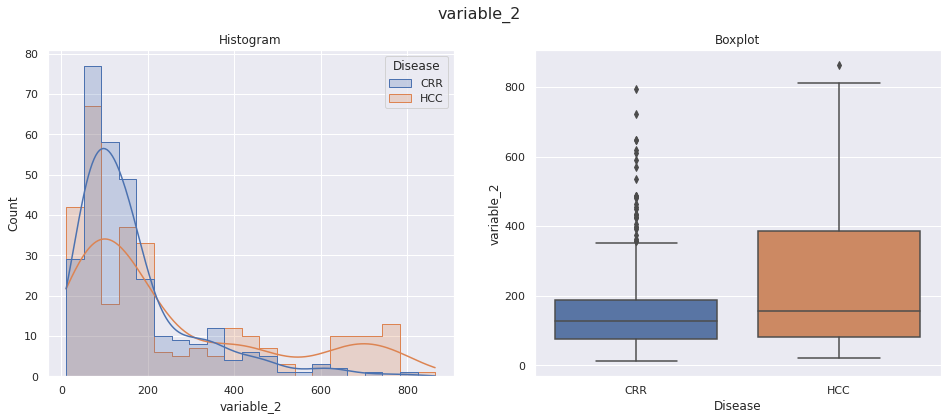

------------------------------------------------------------------------------------------------------------------------


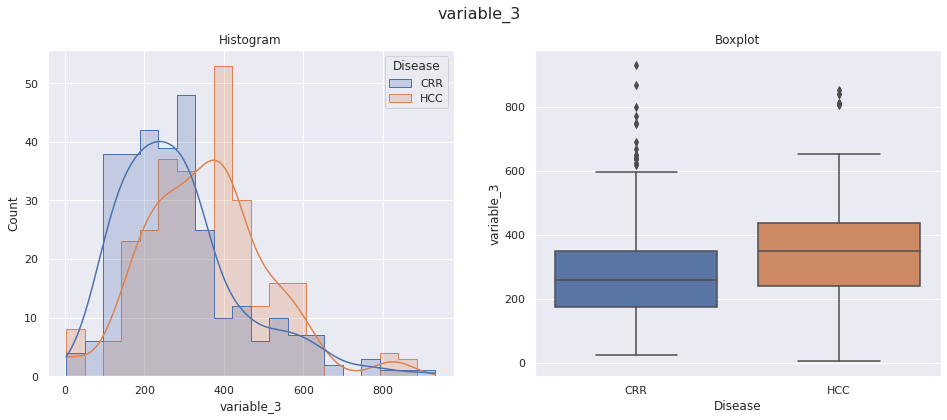

------------------------------------------------------------------------------------------------------------------------


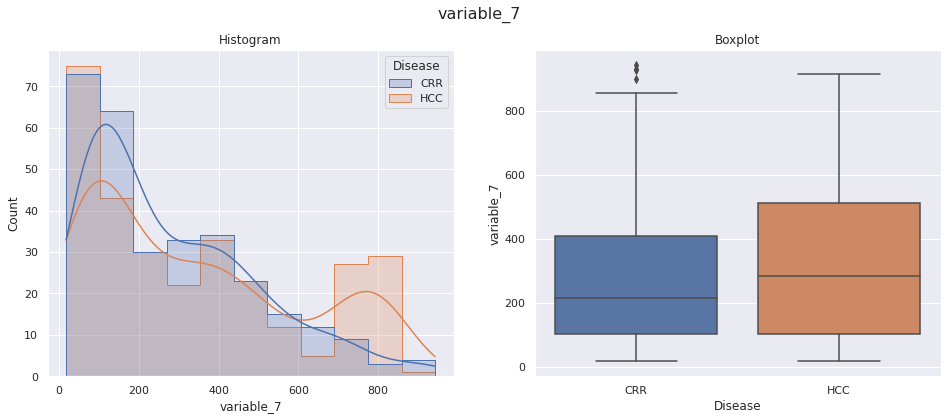

------------------------------------------------------------------------------------------------------------------------


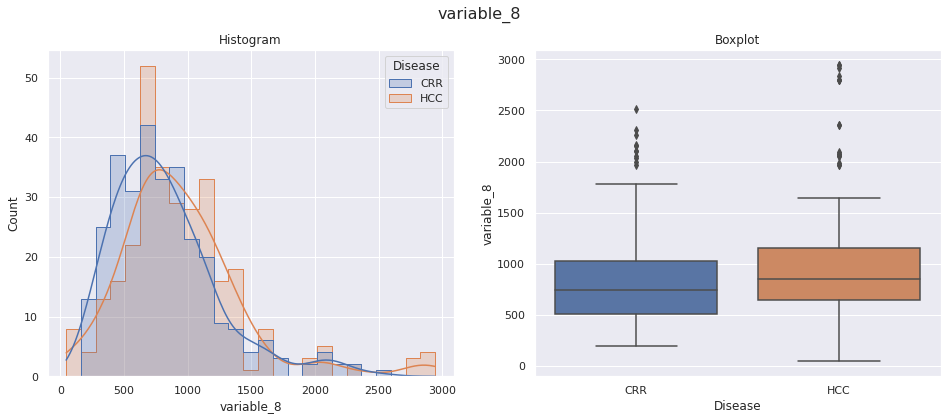

------------------------------------------------------------------------------------------------------------------------


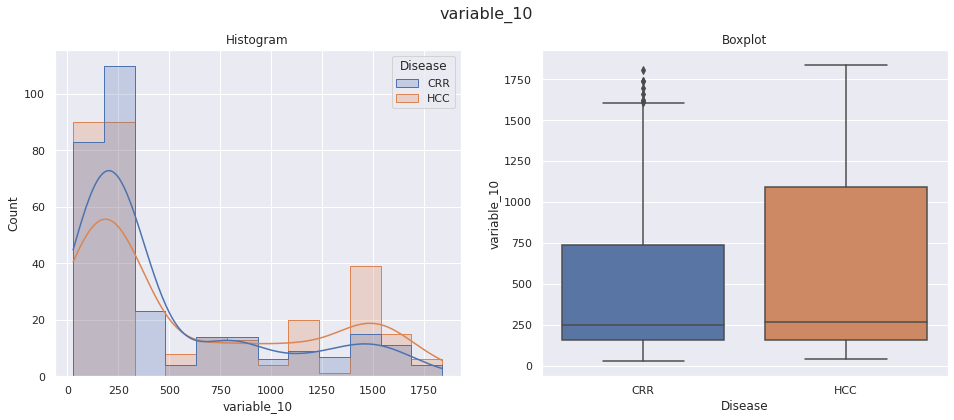

------------------------------------------------------------------------------------------------------------------------


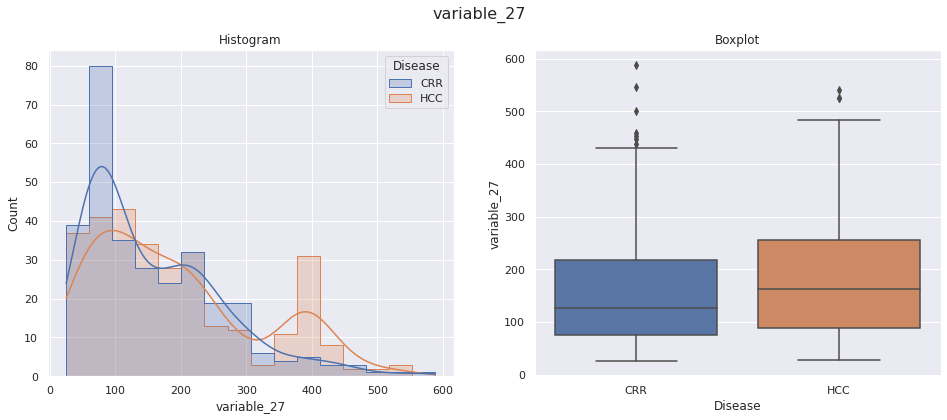

------------------------------------------------------------------------------------------------------------------------ 

######################################################################################################################################################


In [18]:
plot_hist_boxplot_distributions(intensities_remove_corr, target, list_features=features_tests_results_signif['Features'].tolist()[:6])

## b - Histogram of pvalues

THe function <code>plot_hist_pvalue</code> plots an histogram of the pvalues obtained in the function <code>features_tests</code>, whose output dataframe and alpha threshold value have to be passed as arguments.

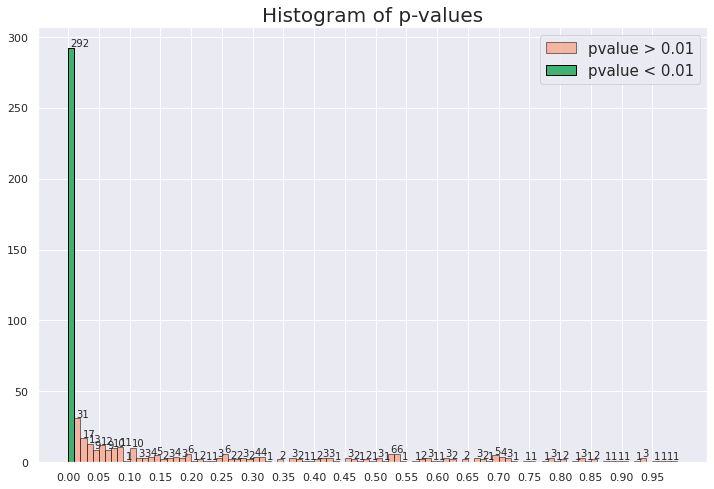

In [19]:
plot_hist_pvalue(features_tests_results, 0.01)

# 3 - Multiple testing correction

"Statistical hypothesis testing is based on rejecting the null hypothesis if the likelihood of the observed data under the null hypotheses is low. If multiple hypotheses are tested, the chance of observing a rare event increases, and therefore, the likelihood of incorrectly rejecting a null hypothesis (i.e., making a Type I error) increases." (cf [link](https://en.wikipedia.org/wiki/Bonferroni_correction))

"Multiple testing correction refers to making statistical tests more stringent in order to counteract the problem of multiple testing" (cf. [link](https://en.wikipedia.org/wiki/Multiple_comparisons_problem))

#### Resources :

- http://www.biostathandbook.com/multiplecomparisons.html
- https://en.wikipedia.org/wiki/Holm%E2%80%93Bonferroni_method#Adjusted_p-values
- https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92
- https://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pq-values.aspx

## a - Bonferroni correction

In [20]:
features_tests_results_Bonferroni = pvalue_correction(df=features_tests_results, correction='Bonferroni', alpha=0.01)
features_tests_results_Bonferroni

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,alpha corrected,H0 rejected corrected
0,variable_1,False,Levene's test,False,Welch's t-test,-2.169426,3.047295e-02,0.01,False,0.000017,False
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,0.000017,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,0.000017,True
3,variable_4,False,Levene's test,False,Welch's t-test,-2.216275,2.704831e-02,0.01,False,0.000017,False
4,variable_5,False,Levene's test,True,Mann-Whitney U test,47203.000000,2.995467e-01,0.01,False,0.000017,False
...,...,...,...,...,...,...,...,...,...,...,...
582,variable_1524,False,Levene's test,False,Welch's t-test,-2.360716,1.856010e-02,0.01,False,0.000017,False
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True,0.000017,False
584,variable_1533,False,Levene's test,True,Mann-Whitney U test,40781.000000,4.692567e-02,0.01,False,0.000017,False
585,variable_1540,False,Levene's test,False,Welch's t-test,-3.248564,1.233444e-03,0.01,True,0.000017,False


In [21]:
df = features_tests_results_Bonferroni.copy()

print(f'Before correction, {sum(df["H0 rejected"]) / df.shape[0] * 100 :.2f}% \
of features are significantly differentially distributed ({sum(df["H0 rejected"])} features).')
print(f'After correction, {sum(df["H0 rejected corrected"]) / df.shape[0] * 100 :.2f}% \
of features are still significantly differentially distributed ({sum(df["H0 rejected corrected"])} features).')
print()
print(f'{df[(df["H0 rejected"] == True) & (df["H0 rejected corrected"] == False)].shape[0]} \
features were significant before but not after the correction, for example the following five features :')

Before correction, 49.74% of features are significantly differentially distributed (292 features).
After correction, 20.27% of features are still significantly differentially distributed (119 features).

173 features were significant before but not after the correction, for example the following five features :


In [22]:
features_tests_results_Bonferroni[(features_tests_results_Bonferroni['H0 rejected'] == True) & \
                                  (features_tests_results_Bonferroni['H0 rejected corrected'] == False)].head()

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,alpha corrected,H0 rejected corrected
6,variable_7,False,Levene's test,False,Welch's t-test,-3.021604,0.002627,0.01,True,0.000017,False
7,variable_8,False,Levene's test,True,Mann-Whitney U test,37256.000000,0.000265,0.01,True,0.000017,False
9,variable_10,False,Levene's test,False,Welch's t-test,-2.968197,0.003119,0.01,True,0.000017,False
17,variable_27,False,Levene's test,False,Welch's t-test,-3.609221,0.000334,0.01,True,0.000017,False
19,variable_31,False,Levene's test,False,Welch's t-test,-4.067196,0.000055,0.01,True,0.000017,False


Below with the function <code>plot_pvalue</code> can observe the pvalue for each feature, zooming on features which have a pvalue lower than *alpha* and *alphaCorrected*.

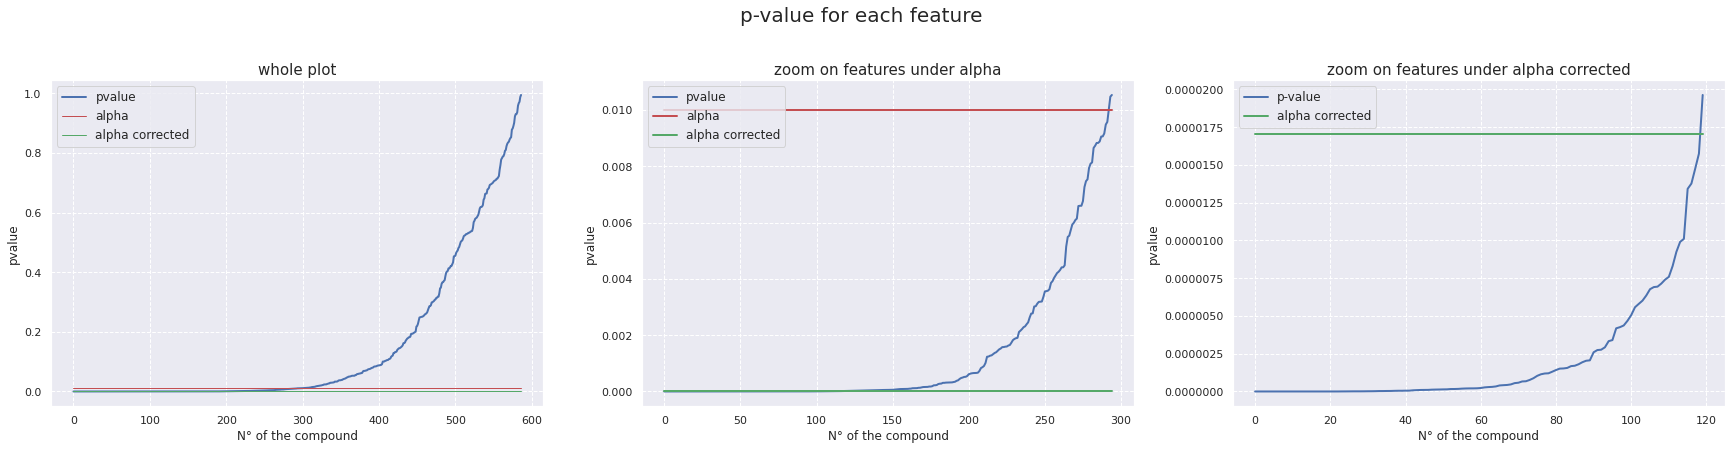

In [23]:
plot_pvalue(features_tests_results_Bonferroni)

Here is the barplot of the number of features with are significantly differentially distributed (True) or not (False).

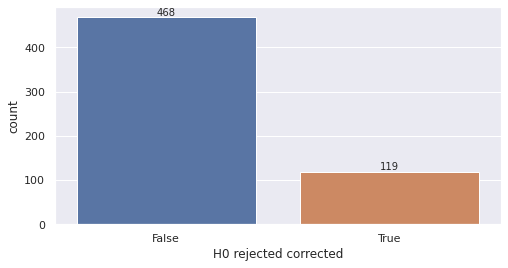

In [24]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='H0 rejected corrected', data=features_tests_results_Bonferroni);
ax.bar_label(ax.containers[0]);

Below are the features which have a significant difference between Incident and Non-case groups.

In [25]:
features_tests_results_Bonferroni[features_tests_results_Bonferroni['H0 rejected corrected'] == True]

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,alpha corrected,H0 rejected corrected
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,0.000017,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,0.000017,True
26,variable_48,False,Levene's test,False,Welch's t-test,4.972743,1.034036e-06,0.01,True,0.000017,True
29,variable_53,False,Levene's test,True,Mann-Whitney U test,34444.000000,6.634187e-07,0.01,True,0.000017,True
35,variable_65,False,Levene's test,False,Welch's t-test,-4.698912,3.400721e-06,0.01,True,0.000017,True
...,...,...,...,...,...,...,...,...,...,...,...
562,variable_1415,False,Levene's test,True,Mann-Whitney U test,35248.000000,4.367453e-06,0.01,True,0.000017,True
575,variable_1501,False,Levene's test,False,Welch's t-test,5.703518,2.113091e-08,0.01,True,0.000017,True
577,variable_1505,False,Levene's test,False,Welch's t-test,4.875099,1.523937e-06,0.01,True,0.000017,True
579,variable_1518,False,Levene's test,True,Mann-Whitney U test,34559.500000,8.770728e-07,0.01,True,0.000017,True


## b - Holm-Bonferroni correction

In [26]:
features_tests_results_HolmBonferroni = pvalue_correction(df=features_tests_results, correction='Holm-Bonferroni', alpha=0.01)
features_tests_results_HolmBonferroni

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,Rank,alpha corrected,H0 rejected corrected
0,variable_1,False,Levene's test,False,Welch's t-test,-2.169426,3.047295e-02,0.01,False,246,0.000041,False
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,554,0.000018,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,569,0.000018,True
3,variable_4,False,Levene's test,False,Welch's t-test,-2.216275,2.704831e-02,0.01,False,252,0.000040,False
4,variable_5,False,Levene's test,True,Mann-Whitney U test,47203.000000,2.995467e-01,0.01,False,117,0.000085,False
...,...,...,...,...,...,...,...,...,...,...,...,...
582,variable_1524,False,Levene's test,False,Welch's t-test,-2.360716,1.856010e-02,0.01,False,267,0.000037,False
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True,393,0.000025,False
584,variable_1533,False,Levene's test,True,Mann-Whitney U test,40781.000000,4.692567e-02,0.01,False,229,0.000044,False
585,variable_1540,False,Levene's test,False,Welch's t-test,-3.248564,1.233444e-03,0.01,True,375,0.000027,False


In [27]:
df = features_tests_results_HolmBonferroni.copy()

print(f'Before correction, {sum(df["H0 rejected"]) / df.shape[0] * 100 :.2f}% \
of features are significantly differentially distributed ({sum(df["H0 rejected"])} features).')
print(f'After correction, {sum(df["H0 rejected corrected"]) / df.shape[0] * 100 :.2f}% \
of features are still significantly differentially distributed ({sum(df["H0 rejected corrected"])} features).')
print()
print(f'{df[(df["H0 rejected"] == True) & (df["H0 rejected corrected"] == False)].shape[0]} \
features were significant before but not after the correction, for example the following five features :')

Before correction, 49.74% of features are significantly differentially distributed (292 features).
After correction, 20.61% of features are still significantly differentially distributed (121 features).

171 features were significant before but not after the correction, for example the following five features :


In [28]:
features_tests_results_HolmBonferroni[(features_tests_results_HolmBonferroni['H0 rejected'] == True) & \
                                      (features_tests_results_HolmBonferroni['H0 rejected corrected'] == False)].head()

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,Rank,alpha corrected,H0 rejected corrected
6,variable_7,False,Levene's test,False,Welch's t-test,-3.021604,0.002627,0.01,True,347,0.000029,False
7,variable_8,False,Levene's test,True,Mann-Whitney U test,37256.000000,0.000265,0.01,True,407,0.000025,False
9,variable_10,False,Levene's test,False,Welch's t-test,-2.968197,0.003119,0.01,True,342,0.000029,False
17,variable_27,False,Levene's test,False,Welch's t-test,-3.609221,0.000334,0.01,True,397,0.000025,False
19,variable_31,False,Levene's test,False,Welch's t-test,-4.067196,0.000055,0.01,True,442,0.000023,False


Below with the function <code>plot_pvalue</code> can observe the pvalue for each feature, zooming on features which have a pvalue lower than *alpha* and *alphaCorrected*.

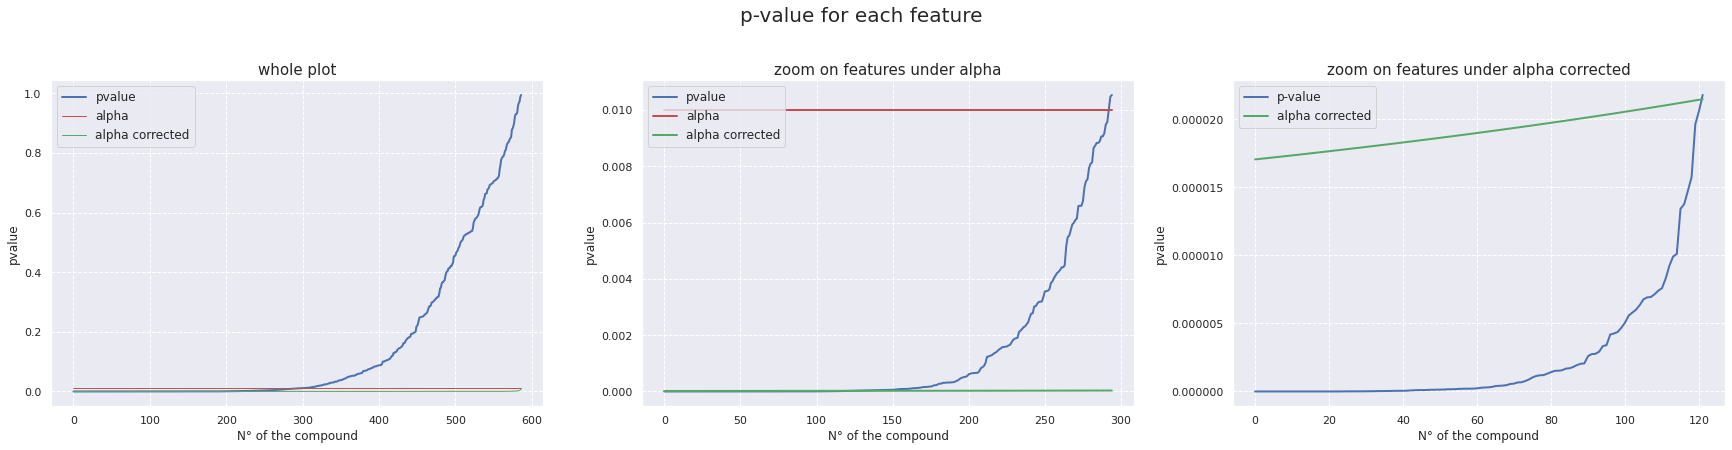

In [29]:
plot_pvalue(features_tests_results_HolmBonferroni)

Here is the barplot of the number of features with are significantly differentially distributed (True) or not (False).

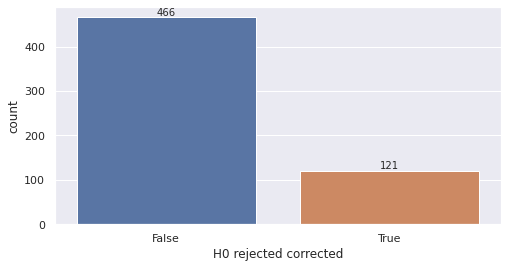

In [30]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='H0 rejected corrected', data=features_tests_results_HolmBonferroni);
ax.bar_label(ax.containers[0]);

Below are the features which have a significant difference between Incident and Non-case groups.

In [31]:
features_tests_results_HolmBonferroni[features_tests_results_HolmBonferroni['H0 rejected corrected'] == True]

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,Rank,alpha corrected,H0 rejected corrected
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,554,0.000018,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,569,0.000018,True
26,variable_48,False,Levene's test,False,Welch's t-test,4.972743,1.034036e-06,0.01,True,512,0.000020,True
29,variable_53,False,Levene's test,True,Mann-Whitney U test,34444.000000,6.634187e-07,0.01,True,516,0.000019,True
35,variable_65,False,Levene's test,False,Welch's t-test,-4.698912,3.400721e-06,0.01,True,492,0.000020,True
...,...,...,...,...,...,...,...,...,...,...,...,...
562,variable_1415,False,Levene's test,True,Mann-Whitney U test,35248.000000,4.367453e-06,0.01,True,489,0.000020,True
575,variable_1501,False,Levene's test,False,Welch's t-test,5.703518,2.113091e-08,0.01,True,555,0.000018,True
577,variable_1505,False,Levene's test,False,Welch's t-test,4.875099,1.523937e-06,0.01,True,505,0.000020,True
579,variable_1518,False,Levene's test,True,Mann-Whitney U test,34559.500000,8.770728e-07,0.01,True,513,0.000019,True


## c - Benjamini-Hochberg correction

In [32]:
features_tests_results_BenjaminiHochberg = pvalue_correction(df=features_tests_results, correction='Benjamini-Hochberg', alpha=0.01)
features_tests_results_BenjaminiHochberg

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,Rank,alpha corrected,H0 rejected corrected
0,variable_1,False,Levene's test,False,Welch's t-test,-2.169426,3.047295e-02,0.01,False,342,0.005826,False
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,34,0.000579,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,19,0.000324,True
3,variable_4,False,Levene's test,False,Welch's t-test,-2.216275,2.704831e-02,0.01,False,336,0.005724,False
4,variable_5,False,Levene's test,True,Mann-Whitney U test,47203.000000,2.995467e-01,0.01,False,471,0.008024,False
...,...,...,...,...,...,...,...,...,...,...,...,...
582,variable_1524,False,Levene's test,False,Welch's t-test,-2.360716,1.856010e-02,0.01,False,321,0.005468,False
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True,195,0.003322,True
584,variable_1533,False,Levene's test,True,Mann-Whitney U test,40781.000000,4.692567e-02,0.01,False,359,0.006116,False
585,variable_1540,False,Levene's test,False,Welch's t-test,-3.248564,1.233444e-03,0.01,True,213,0.003629,True


In [33]:
df = features_tests_results_BenjaminiHochberg.copy()

print(f'Before correction, {sum(df["H0 rejected"]) / df.shape[0] * 100 :.2f}% \
of features are significantly differentially distributed ({sum(df["H0 rejected"])} features).')
print(f'After correction, {sum(df["H0 rejected corrected"]) / df.shape[0] * 100 :.2f}% \
of features are still significantly differentially distributed ({sum(df["H0 rejected corrected"])} features).')
print()
print(f'{df[(df["H0 rejected"] == True) & (df["H0 rejected corrected"] == False)].shape[0]} \
features were significant before but not after the correction, for example the following five features :')

Before correction, 49.74% of features are significantly differentially distributed (292 features).
After correction, 44.97% of features are still significantly differentially distributed (264 features).

28 features were significant before but not after the correction, for example the following five features :


In [34]:
features_tests_results_HolmBonferroni[(features_tests_results_BenjaminiHochberg['H0 rejected'] == True) & \
                                      (features_tests_results_BenjaminiHochberg['H0 rejected corrected'] == False)].head()

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,Rank,alpha corrected,H0 rejected corrected
49,variable_109,False,Levene's test,False,Welch's t-test,2.631083,0.008828,0.01,True,303,0.000033,False
131,variable_265,False,Levene's test,True,Mann-Whitney U test,39104.000000,0.005489,0.01,True,322,0.000031,False
137,variable_277,False,Levene's test,False,Welch's t-test,-2.604721,0.009481,0.01,True,297,0.000034,False
141,variable_284,False,Levene's test,True,Mann-Whitney U test,50824.000000,0.006089,0.01,True,317,0.000032,False
145,variable_290,False,Levene's test,False,Welch's t-test,-2.753216,0.006141,0.01,True,316,0.000032,False


Below with the function <code>plot_pvalue</code> can observe the pvalue for each feature, zooming on features which have a pvalue lower than *alpha* and *alphaCorrected*.

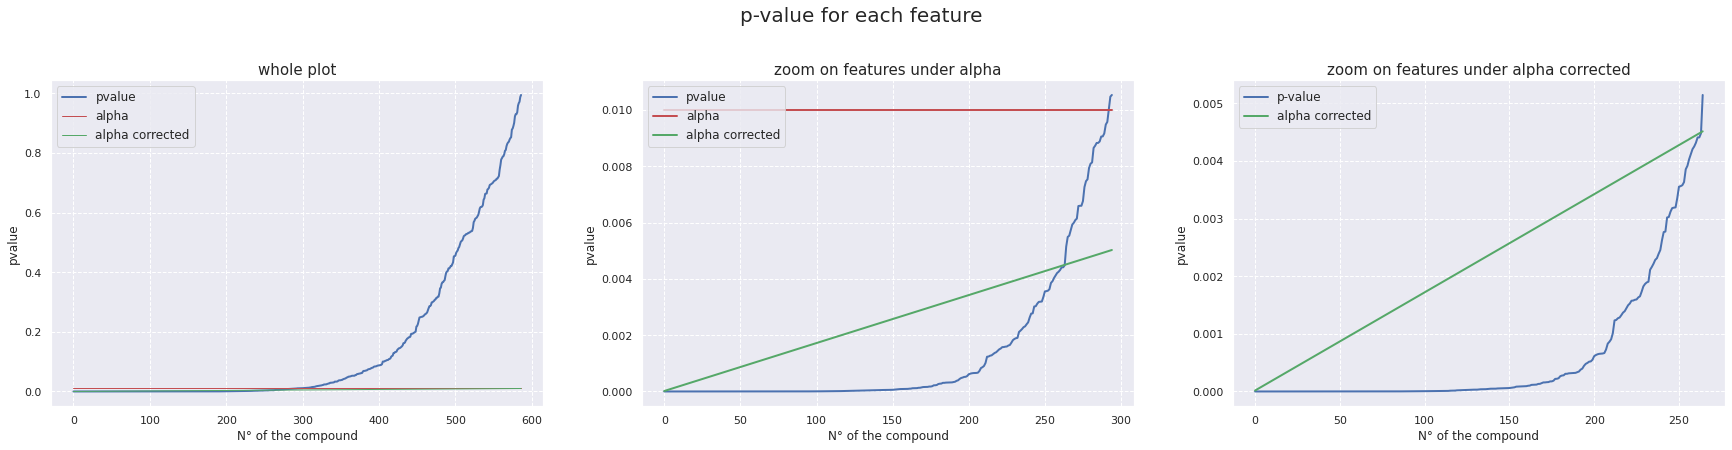

In [35]:
plot_pvalue(features_tests_results_BenjaminiHochberg)

Here is the barplot of the number of features with are significantly differentially distributed (True) or not (False).

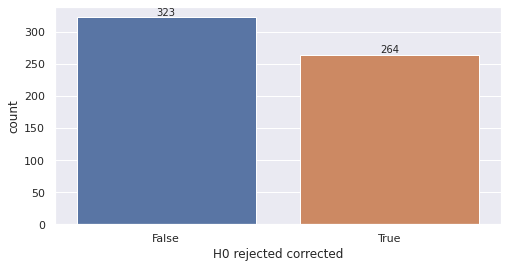

In [36]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='H0 rejected corrected', data=features_tests_results_BenjaminiHochberg);
ax.bar_label(ax.containers[0]);

Below are the features which have a significant difference between Incident and Non-case groups.

In [37]:
features_tests_results_BenjaminiHochberg[features_tests_results_BenjaminiHochberg['H0 rejected corrected'] == True]

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,Rank,alpha corrected,H0 rejected corrected
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,34,0.000579,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,19,0.000324,True
6,variable_7,False,Levene's test,False,Welch's t-test,-3.021604,2.627025e-03,0.01,True,241,0.004106,True
7,variable_8,False,Levene's test,True,Mann-Whitney U test,37256.000000,2.650219e-04,0.01,True,181,0.003083,True
9,variable_10,False,Levene's test,False,Welch's t-test,-2.968197,3.119089e-03,0.01,True,246,0.004191,True
...,...,...,...,...,...,...,...,...,...,...,...,...
579,variable_1518,False,Levene's test,True,Mann-Whitney U test,34559.500000,8.770728e-07,0.01,True,75,0.001278,True
580,variable_1519,False,Levene's test,True,Mann-Whitney U test,38258.000000,1.496641e-03,0.01,True,221,0.003765,True
581,variable_1521,False,Levene's test,True,Mann-Whitney U test,34110.000000,2.911372e-07,0.01,True,63,0.001073,True
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True,195,0.003322,True


## d - FDR correction

In [38]:
features_tests_results_FDR = pvalue_correction(df=features_tests_results, correction='FDR', alpha=0.01)
features_tests_results_FDR

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,pvalue corrected,H0 rejected corrected
0,variable_1,False,Levene's test,False,Welch's t-test,-2.169426,3.047295e-02,0.01,False,5.230298e-02,False
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,4.804285e-07,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,4.863466e-09,True
3,variable_4,False,Levene's test,False,Welch's t-test,-2.216275,2.704831e-02,0.01,False,4.725404e-02,False
4,variable_5,False,Levene's test,True,Mann-Whitney U test,47203.000000,2.995467e-01,0.01,False,3.733204e-01,False
...,...,...,...,...,...,...,...,...,...,...,...
582,variable_1524,False,Levene's test,False,Welch's t-test,-2.360716,1.856010e-02,0.01,False,3.394012e-02,False
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True,1.340781e-03,True
584,variable_1533,False,Levene's test,True,Mann-Whitney U test,40781.000000,4.692567e-02,0.01,False,7.672805e-02,False
585,variable_1540,False,Levene's test,False,Welch's t-test,-3.248564,1.233444e-03,0.01,True,3.399210e-03,True


In [39]:
df = features_tests_results_FDR.copy()

print(f'Before correction, {sum(df["H0 rejected"]) / df.shape[0] * 100 :.2f}% \
of features are significantly differentially distributed ({sum(df["H0 rejected"])} features).')
print(f'After correction, {sum(df["H0 rejected corrected"]) / df.shape[0] * 100 :.2f}% \
of features are still significantly differentially distributed ({sum(df["H0 rejected corrected"])} features).')
print()
print(f'{df[(df["H0 rejected"] == True) & (df["H0 rejected corrected"] == False)].shape[0]} \
features were significant before but not after the correction, for example the following five features :')

Before correction, 49.74% of features are significantly differentially distributed (292 features).
After correction, 44.97% of features are still significantly differentially distributed (264 features).

28 features were significant before but not after the correction, for example the following five features :


In [40]:
features_tests_results_FDR[(features_tests_results_FDR['H0 rejected'] == True) & \
                           (features_tests_results_FDR['H0 rejected corrected'] == False)].head()

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,pvalue corrected,H0 rejected corrected
49,variable_109,False,Levene's test,False,Welch's t-test,2.631083,0.008828,0.01,True,0.018121,False
131,variable_265,False,Levene's test,True,Mann-Whitney U test,39104.000000,0.005489,0.01,True,0.012112,False
137,variable_277,False,Levene's test,False,Welch's t-test,-2.604721,0.009481,0.01,True,0.019125,False
141,variable_284,False,Levene's test,True,Mann-Whitney U test,50824.000000,0.006089,0.01,True,0.013189,False
145,variable_290,False,Levene's test,False,Welch's t-test,-2.753216,0.006141,0.01,True,0.013254,False


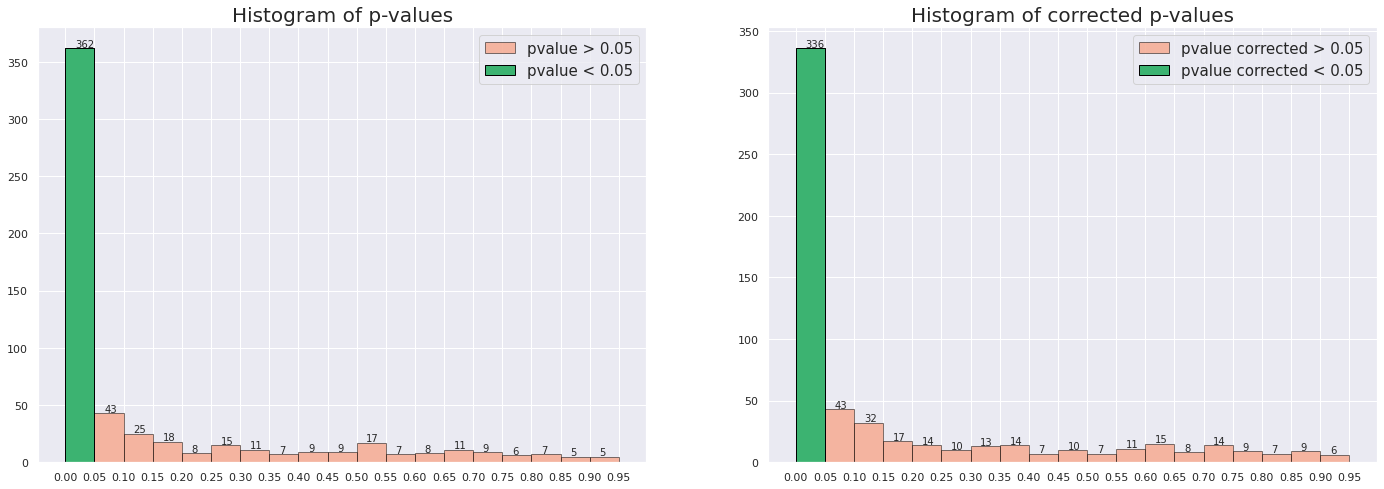

In [41]:
plot_hist_pvalue(features_tests_results_FDR, alpha=0.05, plot_corrected=True)

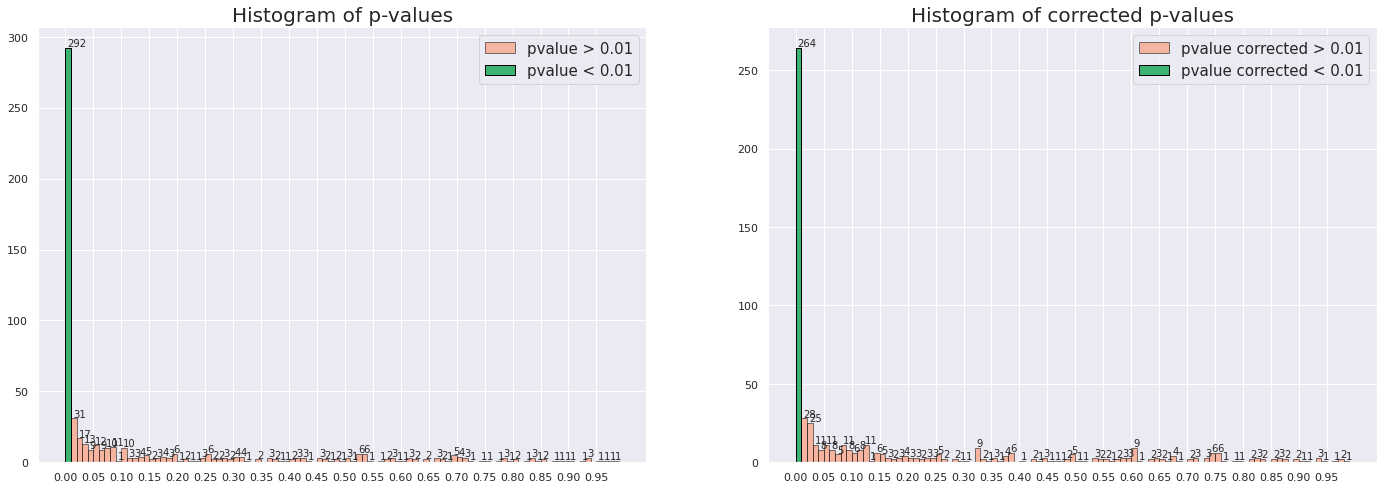

In [42]:
plot_hist_pvalue(features_tests_results_FDR, alpha=0.01, plot_corrected=True)

Here is the barplot of the number of features with are significantly differentially distributed (True) or not (False).

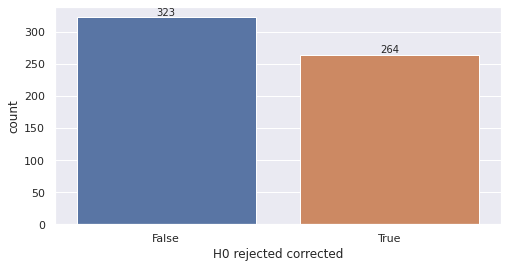

In [43]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='H0 rejected corrected', data=features_tests_results_FDR);
ax.bar_label(ax.containers[0]);

Below are the features which have a significant difference between Incident and Non-case groups.

In [44]:
features_tests_results_FDR[features_tests_results_FDR['H0 rejected corrected'] == True]

,Features,Normally distributed,Variance equality test,Equal variances,Two-sample location test,statistic,pvalue,alpha,H0 rejected,pvalue corrected,H0 rejected corrected
1,variable_2,False,Levene's test,False,Welch's t-test,-5.647794,2.797426e-08,0.01,True,4.804285e-07,True
2,variable_3,False,Levene's test,True,Mann-Whitney U test,31416.000000,1.574205e-10,0.01,True,4.863466e-09,True
6,variable_7,False,Levene's test,False,Welch's t-test,-3.021604,2.627025e-03,0.01,True,6.398603e-03,True
7,variable_8,False,Levene's test,True,Mann-Whitney U test,37256.000000,2.650219e-04,0.01,True,8.594909e-04,True
9,variable_10,False,Levene's test,False,Welch's t-test,-2.968197,3.119089e-03,0.01,True,7.442704e-03,True
...,...,...,...,...,...,...,...,...,...,...,...
579,variable_1518,False,Levene's test,True,Mann-Whitney U test,34559.500000,8.770728e-07,0.01,True,6.864557e-06,True
580,variable_1519,False,Levene's test,True,Mann-Whitney U test,38258.000000,1.496641e-03,0.01,True,3.975241e-03,True
581,variable_1521,False,Levene's test,True,Mann-Whitney U test,34110.000000,2.911372e-07,0.01,True,2.712660e-06,True
583,variable_1528,False,Levene's test,False,Welch's t-test,-3.531391,4.454044e-04,0.01,True,1.340781e-03,True


# 4 - Relative log abundance

Function <code>plot_relative_log_abundance</code> plots the relative log abundance for each variable (based on metabolites) and each sample.

We plot only significant features after the Bonferroni correction.

/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


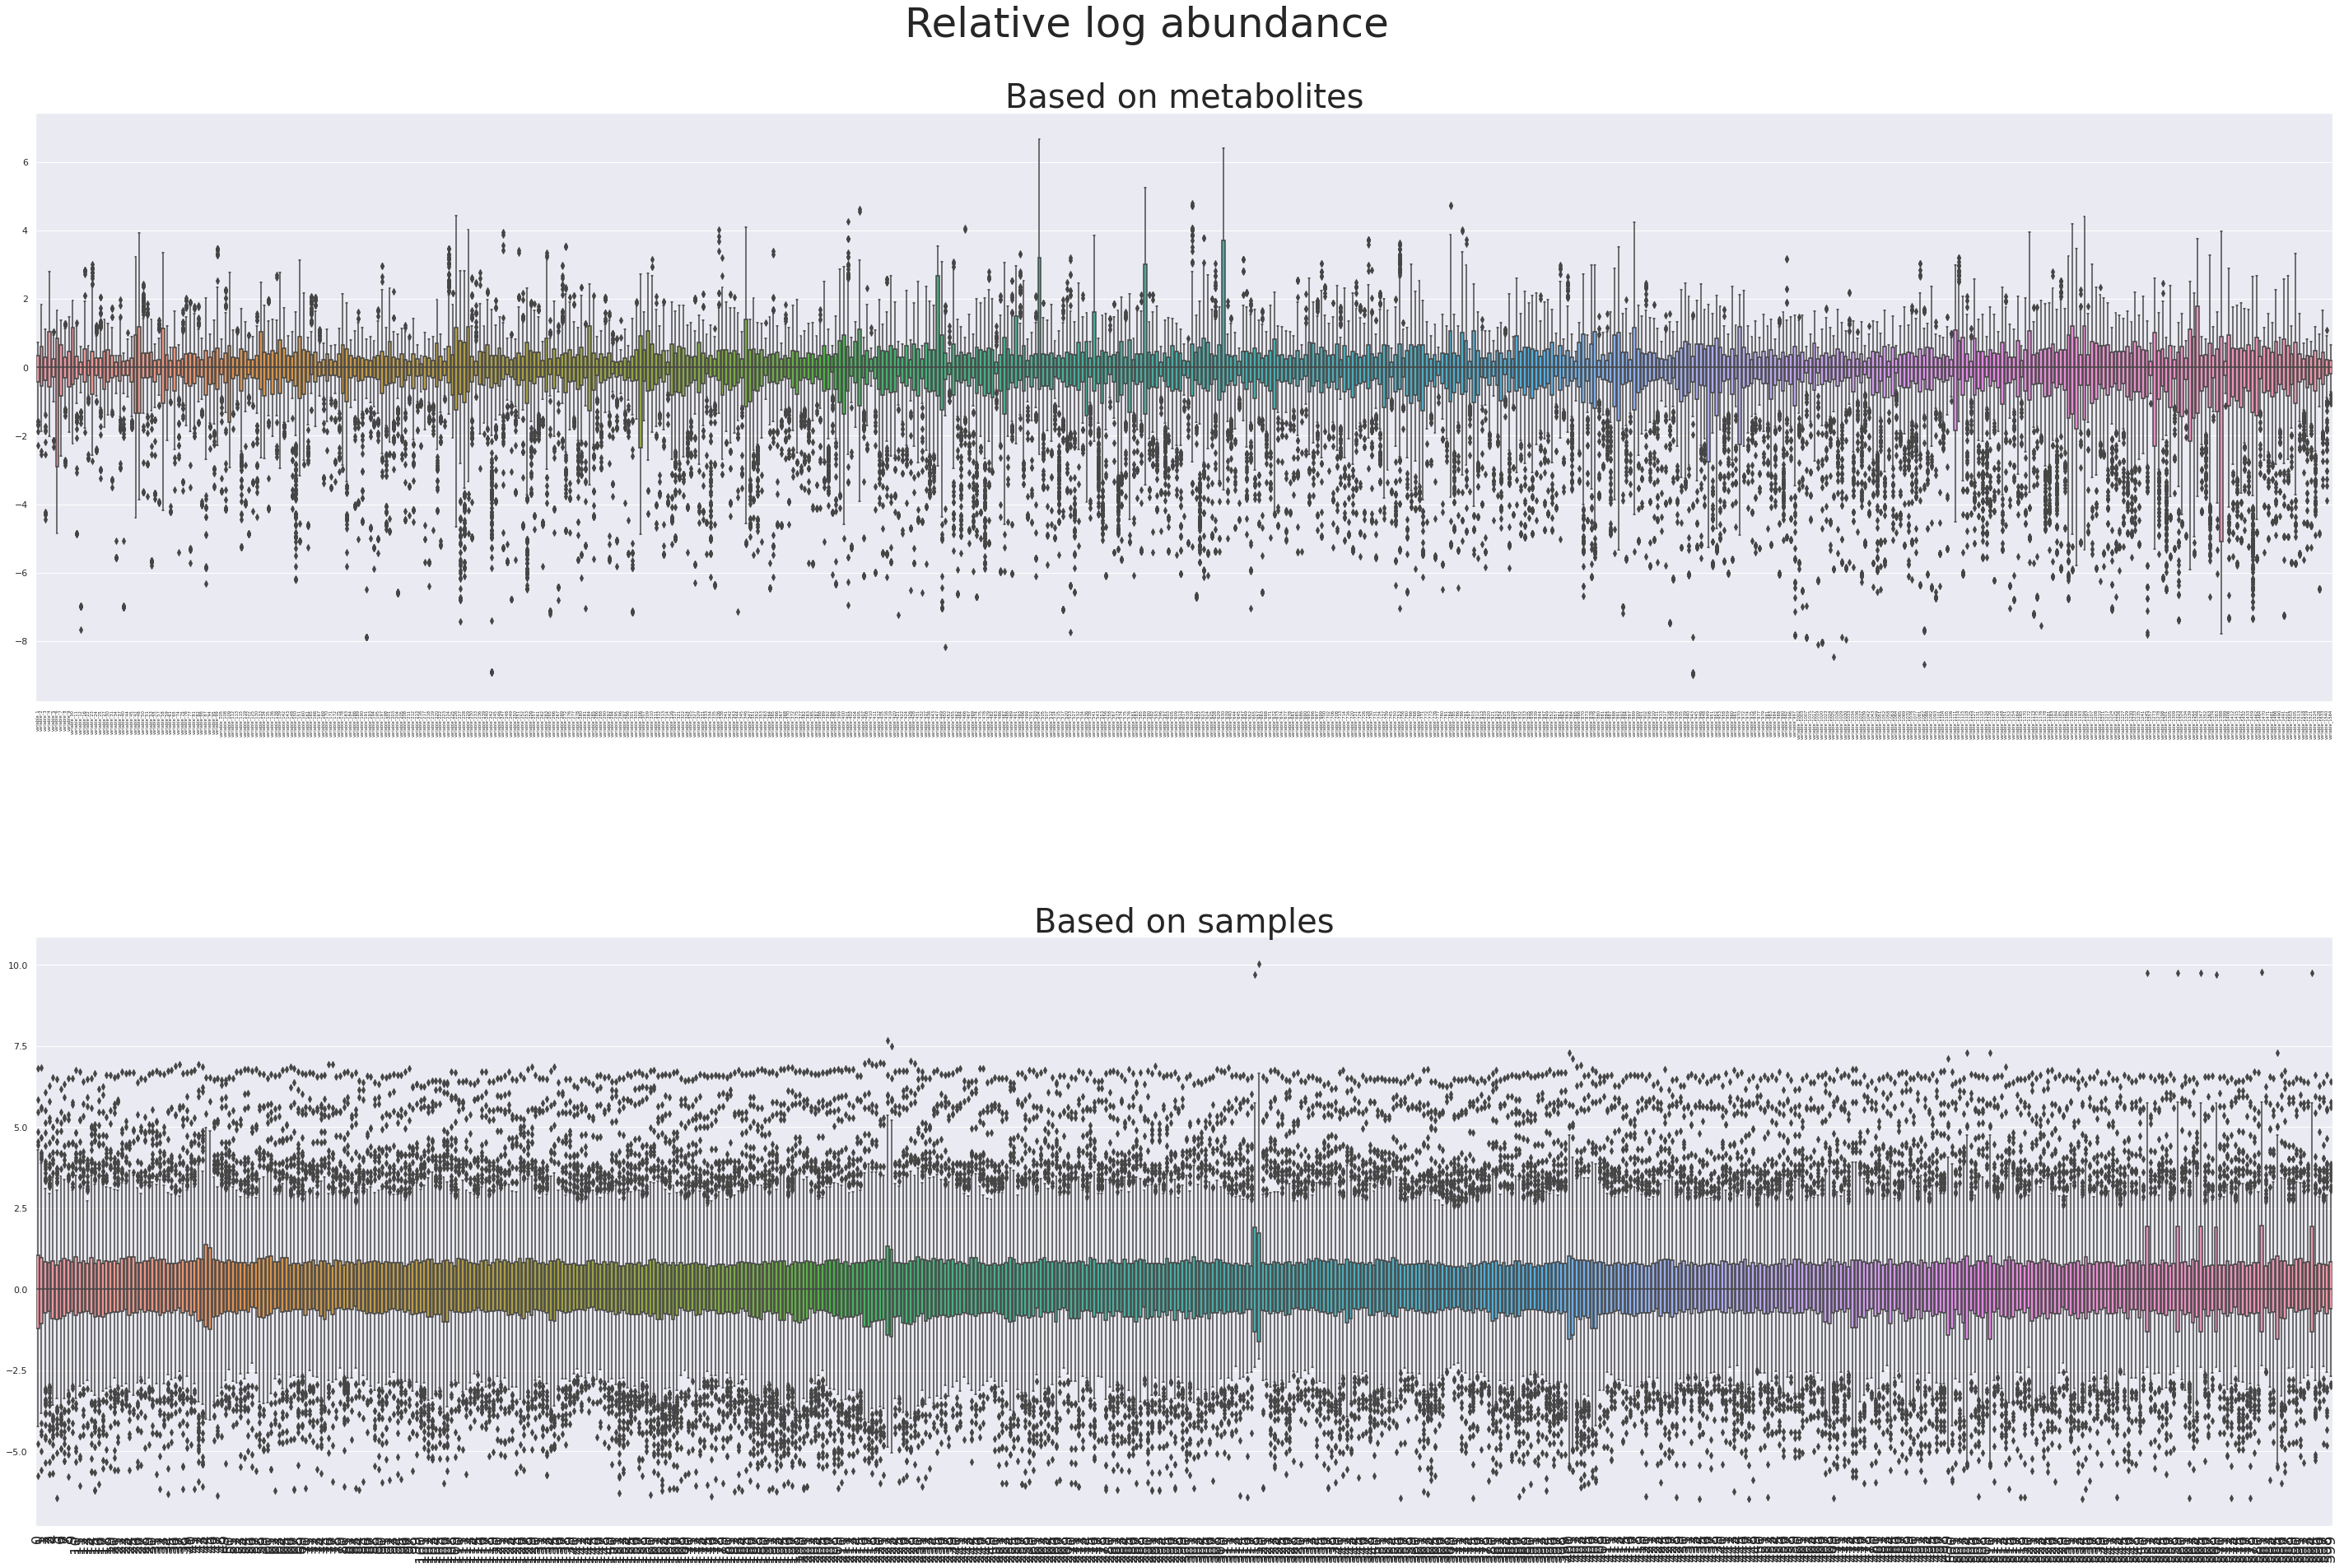

In [45]:
plot_relative_log_abundance(intensities_remove_corr[features_tests_results_Bonferroni['Features'].tolist()])

#### Visualisations are not so good if there are too many dimensions.